# Explore here

Diabetes Prediction Solution

In [201]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns

In [202]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
datacore = data.copy()
data1 = data.copy()
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [203]:
#datacore = datacore.drop( )
datacore.drop(labels=datacore[datacore["Glucose"] == 0 ].index, inplace=True)
datacore.drop(labels=datacore[datacore["BloodPressure"] == 0 ].index, inplace=True)
datacore.drop(labels=datacore[datacore["BMI"] == 0 ].index, inplace=True)
datacore.drop(labels=datacore[datacore["SkinThickness"] == 0 ].index, inplace=True)
datacore.drop(labels=datacore[datacore["Insulin"] == 0 ].index, inplace=True)

In [ ]:
datacore["Outcome"].value_counts()

Outcome
0    262
1    130
Name: count, dtype: int64

In [205]:
from scipy.stats.mstats import winsorize

datacore['Insulin_winsorized'] = winsorize(datacore['Insulin'], limits=[0.05, 0.05]) 

MODELO DE ARBOLES ALEATORIOS 

In [206]:
datacore.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'Insulin_winsorized'],
      dtype='object')

In [207]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Define tus variables independientes (X) y dependiente (y)
X = datacore.drop(columns=['Outcome'], axis=1)  # Reemplaza 'columna_objetivo' por el nombre real de la variable objetivo
y = datacore["Outcome"]

# Divide el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# Imprimir tamaños resultantes
print('Tamaño set de entrenamiento: ', X_train.shape, y_train.shape)
print('Tamaño set de prueba: ', X_test.shape, y_test.shape)

# Distribución de categorías
print('Distribución de categorías dataset original: ', y.value_counts(normalize=True))
print('Distribución de categorías dataset entrenamiento: ', y_train.value_counts(normalize=True))
print('Distribución de categorías dataset prueba: ', y_test.value_counts(normalize=True))

# Muestra las primeras filas del conjunto de entrenamiento
print(datacore["Outcome"].value_counts())
print(X.columns)
 

Tamaño set de entrenamiento:  (313, 9) (313,)
Tamaño set de prueba:  (79, 9) (79,)
Distribución de categorías dataset original:  Outcome
0    0.668367
1    0.331633
Name: proportion, dtype: float64
Distribución de categorías dataset entrenamiento:  Outcome
0    0.667732
1    0.332268
Name: proportion, dtype: float64
Distribución de categorías dataset prueba:  Outcome
0    0.670886
1    0.329114
Name: proportion, dtype: float64
Outcome
0    262
1    130
Name: count, dtype: int64
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin_winsorized'],
      dtype='object')


In [208]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)



RandomForestClassifier(random_state=42)

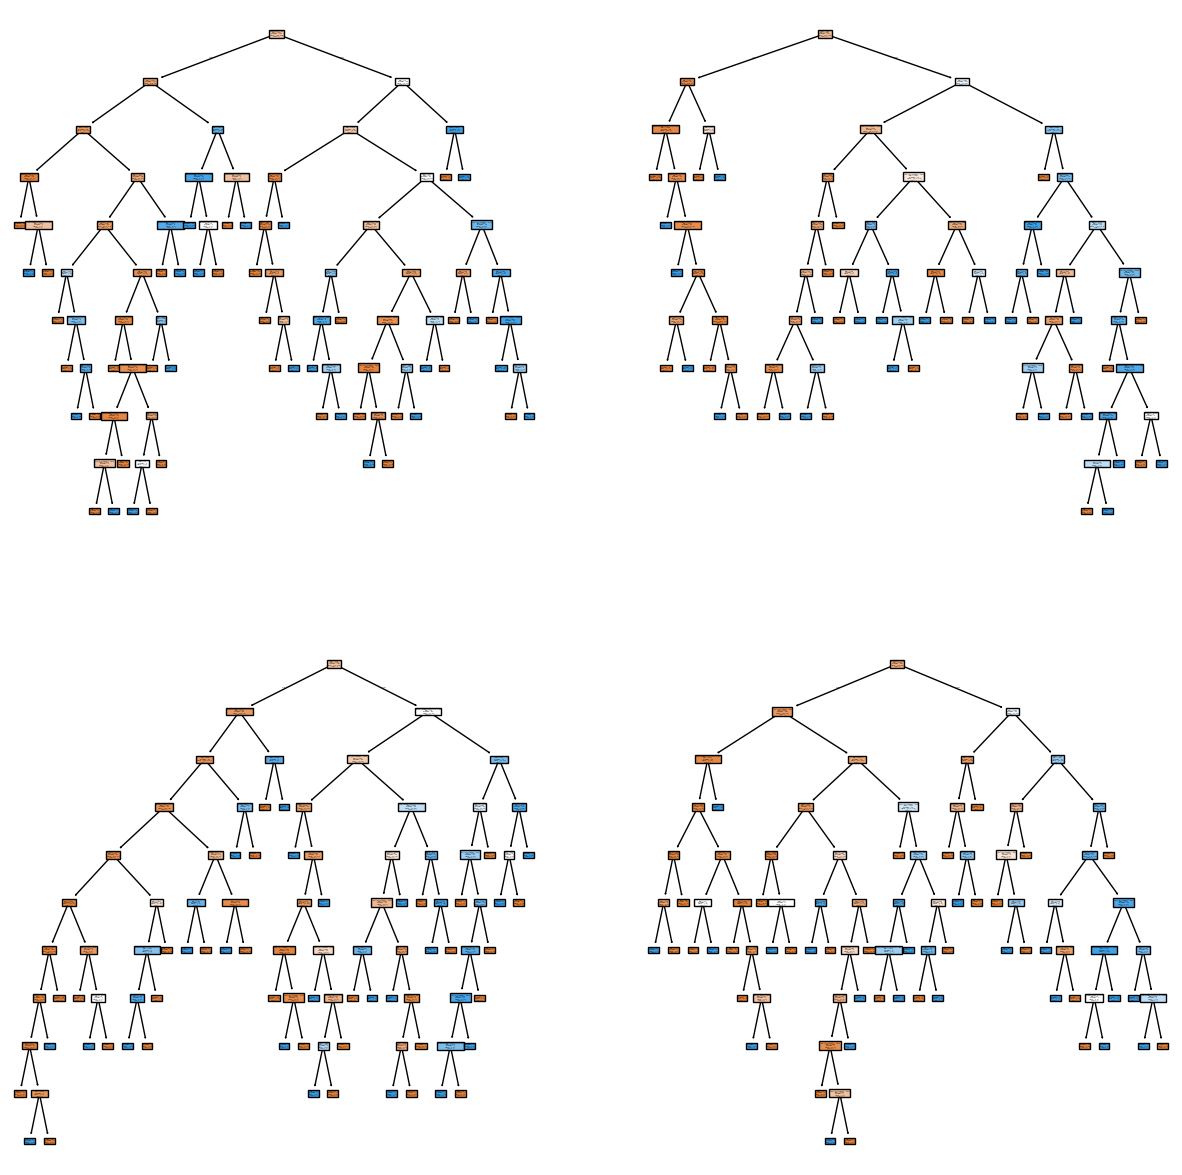

In [209]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [210]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [211]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.7307692307692307


In [212]:
from sklearn import metrics

accuracy_score(y_test, y_pred)

0.8227848101265823

In [213]:
confusion_matrix(y_test,y_pred)


array([[46,  7],
       [ 7, 19]])

In [214]:
precision = precision_score(y_test, y_pred)

In [215]:
# Inicializar modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

# Listas para almacenar los resultados
lista_rf, lista_dt = [], []

# Repetir 20 veces
for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
    
    rf.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    
    pred_rf = rf.predict(X_test)
    pred_dt = dt.predict(X_test)
    
    acc_rf = accuracy_score(y_test, pred_rf)
    acc_dt = accuracy_score(y_test, pred_dt)
    
    lista_rf.append(acc_rf)
    lista_dt.append(acc_dt)

# Promedio de accuracy
print("Accuracy promedio Random Forest:", np.mean(lista_rf))
print("Accuracy promedio Decision Tree:", np.mean(lista_dt))

Accuracy promedio Random Forest: 0.7500000000000002
Accuracy promedio Decision Tree: 0.7076271186440678


CAMBIANDO HIPERPARAMETROS

In [216]:
depths = range(1, 21)  # Probar max_depth desde 1 hasta 20
accuracy_por_depth = []

for depth in depths:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracy_por_depth.append(acc)
    print(f"max_depth = {depth}, accuracy = {acc:.4f}")

# Si quieres ver qué profundidad dio mejor resultado
mejor_depth = depths[np.argmax(accuracy_por_depth)]
print(f"\n✅ Mejor max_depth: {mejor_depth} con accuracy de {max(accuracy_por_depth):.4f}")

max_depth = 1, accuracy = 0.7966
max_depth = 2, accuracy = 0.7627
max_depth = 3, accuracy = 0.7288
max_depth = 4, accuracy = 0.7288
max_depth = 5, accuracy = 0.7288
max_depth = 6, accuracy = 0.7288
max_depth = 7, accuracy = 0.7119
max_depth = 8, accuracy = 0.7288
max_depth = 9, accuracy = 0.6949
max_depth = 10, accuracy = 0.7288
max_depth = 11, accuracy = 0.7627
max_depth = 12, accuracy = 0.7627
max_depth = 13, accuracy = 0.7458
max_depth = 14, accuracy = 0.7627
max_depth = 15, accuracy = 0.7627
max_depth = 16, accuracy = 0.7627
max_depth = 17, accuracy = 0.7627
max_depth = 18, accuracy = 0.7627
max_depth = 19, accuracy = 0.7627
max_depth = 20, accuracy = 0.7627

✅ Mejor max_depth: 1 con accuracy de 0.7966


In [217]:
model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=mejor_depth)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, n_estimators=200, random_state=42)

In [218]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [219]:
accuracy_score(y_test, y_pred)

0.7966101694915254

In [220]:
confusion_matrix(y_test,y_pred)

array([[41,  1],
       [11,  6]])

In [221]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.8571428571428571


F1-score engloba los dos presicion y sencibilidad

In [222]:
from sklearn.metrics import f1_score

# Ya deberías tener y_pred
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

F1 Score: 0.5


La sensibilidad le da mas precision a la precision

In [223]:
from pickle import dump

with open("Random_forest_classifier_default_42.sav", "wb") as f:
    dump(model, f)